In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
shoppers_data = pd.read_csv('enriched_shoppers_data.csv')
shoppers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Administrative                12205 non-null  int64  
 1   Administrative_Duration       12205 non-null  float64
 2   Informational                 12205 non-null  int64  
 3   Informational_Duration        12205 non-null  float64
 4   ProductRelated                12205 non-null  int64  
 5   ProductRelated_Duration       12205 non-null  float64
 6   BounceRates                   12205 non-null  float64
 7   ExitRates                     12205 non-null  float64
 8   PageValues                    12205 non-null  float64
 9   SpecialDay                    12205 non-null  float64
 10  Month                         12205 non-null  object 
 11  OperatingSystems              12205 non-null  int64  
 12  Browser                       12205 non-null  int64  
 13  R

In [14]:
conversion_rate = shoppers_data['Revenue'].mean() * 100
print(f"\nOverall Conversion Rate: {conversion_rate:.2f}%")


Overall Conversion Rate: 15.63%


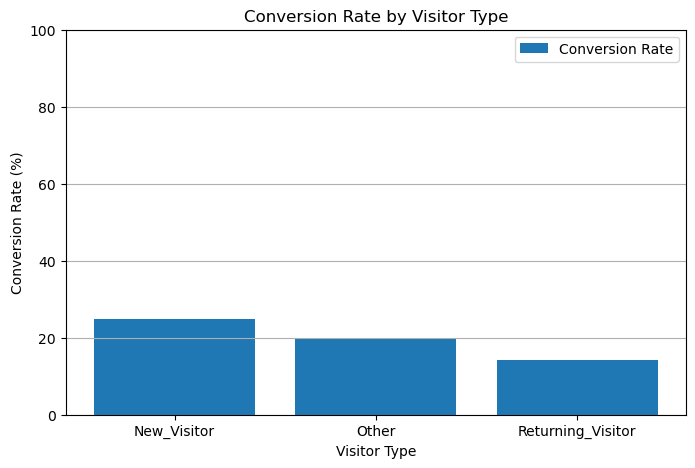

In [15]:
conversion_by_visitor = shoppers_data.groupby('VisitorType')['Revenue'].mean() * 100

plt.figure(figsize=(8,5))
bars = plt.bar(conversion_by_visitor.index, conversion_by_visitor.values)
plt.title('Conversion Rate by Visitor Type')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Visitor Type')
plt.ylim(0, 100)
plt.legend(['Conversion Rate'])
plt.grid(axis='y')
plt.show()

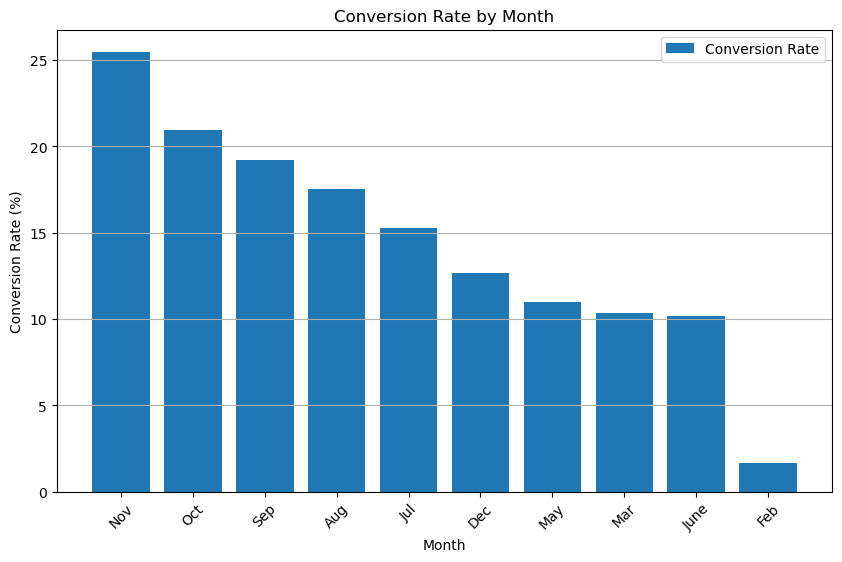

In [16]:
conversion_by_month = shoppers_data.groupby('Month')['Revenue'].mean() * 100
conversion_by_month = conversion_by_month.sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(conversion_by_month.index, conversion_by_month.values)
plt.title('Conversion Rate by Month')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(['Conversion Rate'])
plt.grid(axis='y')
plt.show()

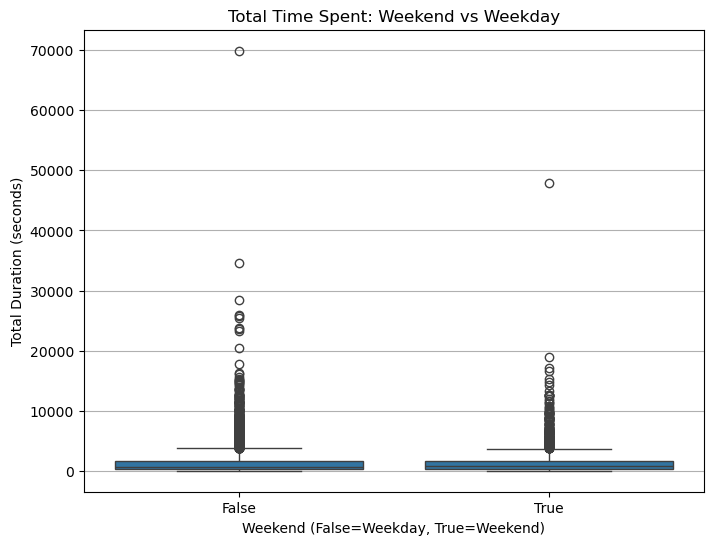

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Weekend', y='total_duration', data=shoppers_data)
plt.title('Total Time Spent: Weekend vs Weekday')
plt.xlabel('Weekend (False=Weekday, True=Weekend)')
plt.ylabel('Total Duration (seconds)')
plt.grid(axis='y')
plt.show()

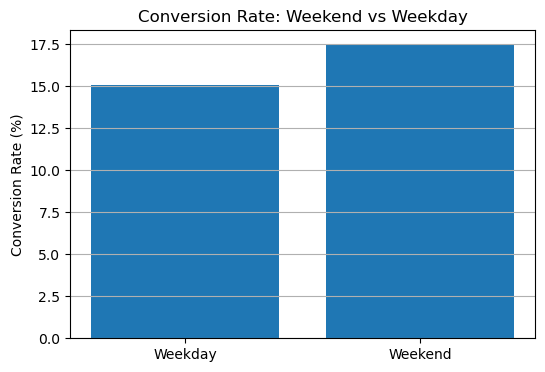

In [17]:
weekend_conversion = shoppers_data.groupby('Weekend')['Revenue'].mean() * 100

plt.figure(figsize=(6,4))
plt.bar(['Weekday', 'Weekend'], weekend_conversion.values)
plt.title('Conversion Rate: Weekend vs Weekday')
plt.ylabel('Conversion Rate (%)')
plt.grid(axis='y')
plt.show()

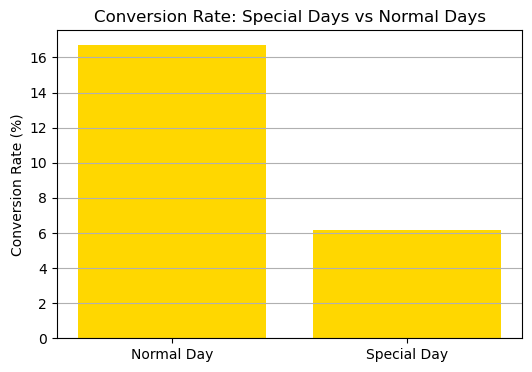

In [18]:
specialday_conversion = shoppers_data.copy()
specialday_conversion['SpecialDayFlag'] = specialday_conversion['SpecialDay'].apply(lambda x: 'Special Day' if x > 0 else 'Normal Day')
specialday_rate = specialday_conversion.groupby('SpecialDayFlag')['Revenue'].mean() * 100

plt.figure(figsize=(6,4))
plt.bar(specialday_rate.index, specialday_rate.values, color='gold')
plt.title('Conversion Rate: Special Days vs Normal Days')
plt.ylabel('Conversion Rate (%)')
plt.grid(axis='y')
plt.show()


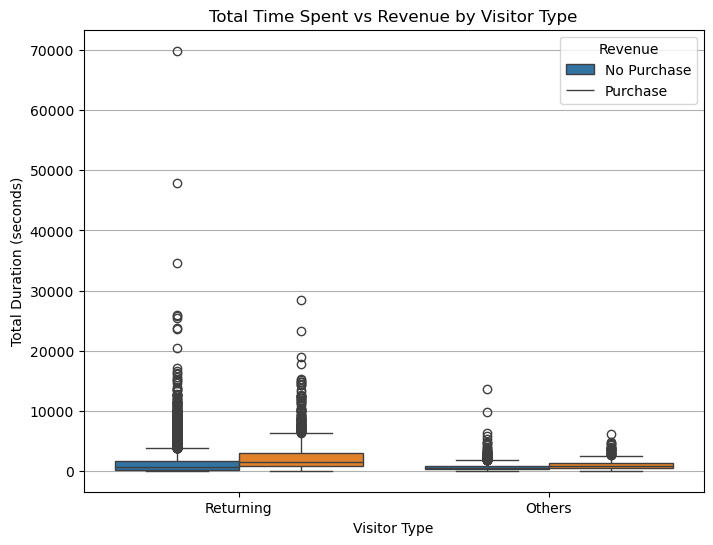

In [21]:
shoppers_data['IsReturningVisitor'] = shoppers_data['VisitorType'].apply(lambda x: 'Returning' if x == 'Returning_Visitor' else 'Others')

plt.figure(figsize=(8,6))
sns.boxplot(x='IsReturningVisitor', y='total_duration', hue='Revenue', data=shoppers_data)
plt.title('Total Time Spent vs Revenue by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Total Duration (seconds)')
plt.legend(title='Revenue', labels=['No Purchase', 'Purchase'])
plt.grid(axis='y')
plt.show()

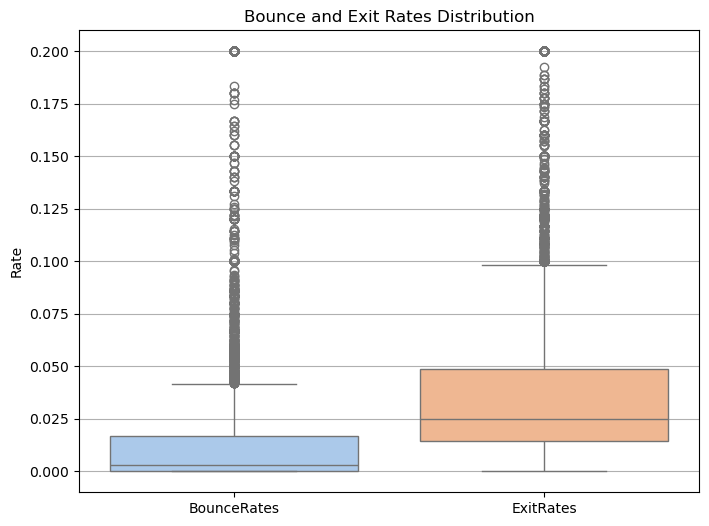

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=shoppers_data[['BounceRates', 'ExitRates']], palette='pastel')
plt.title('Bounce and Exit Rates Distribution')
plt.ylabel('Rate')
plt.grid(axis='y')
plt.show()

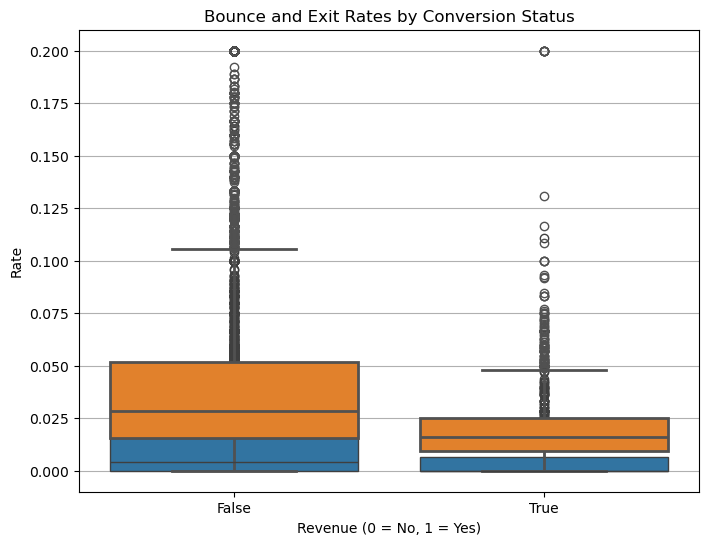

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Revenue', y='BounceRates', data=shoppers_data)
sns.boxplot(x='Revenue', y='ExitRates', data=shoppers_data, linewidth=2)
plt.title('Bounce and Exit Rates by Conversion Status')
plt.xlabel('Revenue (0 = No, 1 = Yes)')
plt.ylabel('Rate')
plt.grid(axis='y')
plt.show()

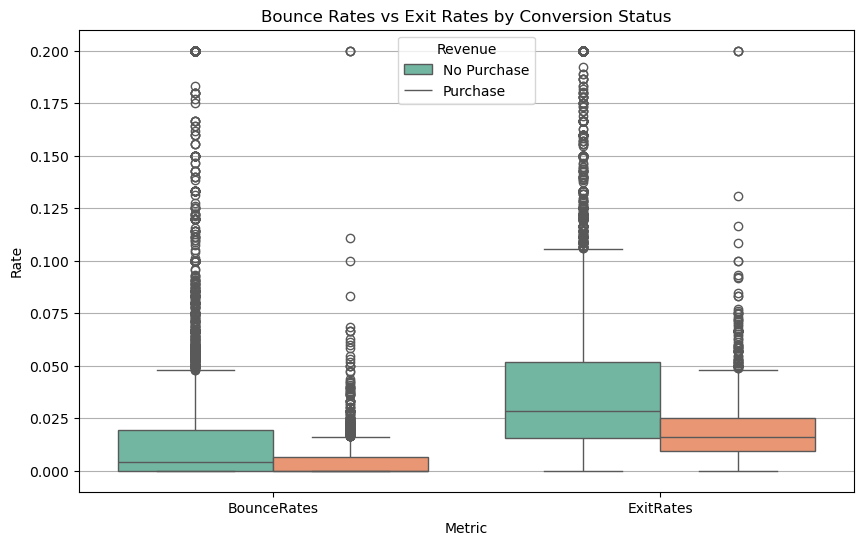

In [ ]:
plt.figure(figsize=(10,6))

bounce = shoppers_data[['Revenue', 'BounceRates']].copy()
bounce['Metric'] = 'BounceRates'
bounce = bounce.rename(columns={'BounceRates': 'Rate'})

exit_ = shoppers_data[['Revenue', 'ExitRates']].copy()
exit_['Metric'] = 'ExitRates'
exit_ = exit_.rename(columns={'ExitRates': 'Rate'})

combined = pd.concat([bounce, exit_])

sns.boxplot(x='Metric', y='Rate', hue='Revenue', data=combined, palette='Set2')
plt.title('Bounce Rates vs Exit Rates by Conversion Status')
plt.xlabel('Metric')
plt.ylabel('Rate')
plt.legend(title='Revenue', labels=['No Purchase', 'Purchase'])
plt.grid(axis='y')
plt.show()